A reinforcement learning environment is basically a simulator or a real world system  designed mainly for to support the model based algorithm to make optimal decisions and Model-based Reinforcement Learning  represents of the environment's dynamics to plan actions. The environment must provide a structure that enables the agent to simulate future outcomes and make informed decisions based on predictions.

In [1]:
import gym
import numpy as np
from gym import spaces 
import matplotlib.pyplot as plt


Grid World:
0 1 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 1 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 1 0 0 0
0 0 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 1 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 1 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 1 0 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 1 0 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 1 0
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 1
0 0 0 0 2
Grid World:
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 2
Reached the goal!


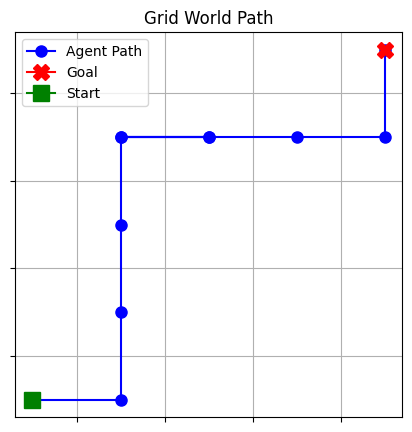

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import gym
from gym import spaces

class GridWorldEnv(gym.Env):
    def __init__(self, grid_size=(5, 5), goal_position=(4, 4)):
        super(GridWorldEnv, self).__init__()

        # Grid size and goal position
        self.grid_size = grid_size
        self.goal_position = goal_position
        
        # Action space: 4 actions (up, down, left, right)
        self.action_space = spaces.Discrete(4)

        # Observation space: the grid has (n, n) states
        self.observation_space = spaces.Discrete(grid_size[0] * grid_size[1])

        # Initial state (top-left corner of the grid)
        self.state = (0, 0)

    def reset(self):
        """Reset the environment to the initial state."""
        self.state = (0, 0)
        return self.state

    def step(self, action):
        """Take an action and return the next state, reward, done flag, and additional info."""
        x, y = self.state

        # Perform the action
        if action == 0:  # up
            x = max(0, x - 1)
        elif action == 1:  # down
            x = min(self.grid_size[0] - 1, x + 1)
        elif action == 2:  # left
            y = max(0, y - 1)
        elif action == 3:  # right
            y = min(self.grid_size[1] - 1, y + 1)

        # Update state
        self.state = (x, y)

        # Reward for reaching the goal
        if self.state == self.goal_position:
            return self.state, 1, True, {}

        # Otherwise, reward for each step taken
        return self.state, -1, False, {}

    def render(self):
        """Render the environment (visualize the grid)."""
        grid = np.zeros(self.grid_size)
        x, y = self.state
        grid[x, y] = 1  # Mark the agent's position
        grid[self.goal_position] = 2  # Mark the goal position

        print("Grid World:")
        for row in grid:
            print(" ".join(str(int(cell)) for cell in row))

# Initialize the environment
env = GridWorldEnv()

# Reset the environment
state = env.reset()

# Store states and actions for plotting
states = [state]
actions = []

# Simulate an agent taking random actions
for _ in range(20):  # Limit the number of steps
    action = env.action_space.sample()  # Random action
    actions.append(action)
    
    # Take a step in the environment
    next_state, reward, done, _ = env.step(action)
    states.append(next_state)

    # Render the environment's state
    env.render()
    
    if done:
        print("Reached the goal!")
        break

# Plotting the agent's path on the grid
states = np.array(states)
fig, ax = plt.subplots(figsize=(5, 5))

# Plot grid
ax.set_xticks(np.arange(-0.5, env.grid_size[1], 1))
ax.set_yticks(np.arange(-0.5, env.grid_size[0], 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='both')

# Plot agent's path (mark with circles)
ax.plot(states[:, 1], states[:, 0], marker='o', color='blue', linestyle='-', markersize=8, label="Agent Path")

# Plot the goal (target state)
ax.plot(env.goal_position[1], env.goal_position[0], marker='X', color='red', markersize=12, label="Goal")

# Mark start position
ax.plot(0, 0, marker='s', color='green', markersize=12, label="Start")

plt.title("Grid World Path")
plt.legend()
plt.show()


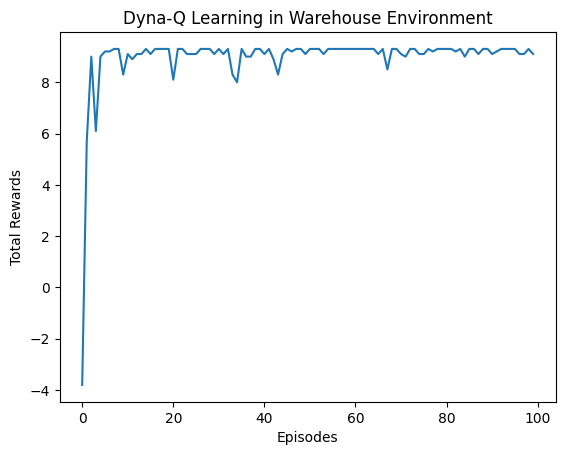

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Environment setup
class WarehouseEnv:
    def __init__(self, grid_size=(5, 5), obstacles=None, goal=(4, 4)):
        self.grid_size = grid_size
        self.obstacles = obstacles if obstacles else [(2, 2), (3, 3)]
        self.goal = goal
        self.reset()

    def reset(self):
        self.agent_pos = (0, 0)
        return self.agent_pos

    def step(self, action):
        x, y = self.agent_pos
        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size[1] - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size[0] - 1, x + 1)
        next_pos = (x, y)

        # Reward logic
        if next_pos in self.obstacles:
            reward = -1
            next_pos = self.agent_pos  # Stay in place
        elif next_pos == self.goal:
            reward = 10
        else:
            reward = -0.1

        self.agent_pos = next_pos
        done = next_pos == self.goal
        return next_pos, reward, done

    def get_grid(self):
        grid = np.zeros(self.grid_size)
        grid[self.goal] = 2  # Goal
        for obs in self.obstacles:
            grid[obs] = -1  # Obstacles
        x, y = self.agent_pos
        grid[x, y] = 1  # Agent
        return grid

# Dyna-Q Agent
class DynaQAgent:
    def __init__(self, env, alpha=0.1, gamma=0.95, epsilon=0.1, planning_steps=5):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.planning_steps = planning_steps
        self.q_table = {}
        self.model = {}

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def update_q_value(self, state, action, value):
        self.q_table[(state, action)] = value

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(4)  # Random action
        else:
            q_values = [self.get_q_value(state, a) for a in range(4)]
            return np.argmax(q_values)

    def learn(self, episodes):
        rewards = []
        grids = []
        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            done = False

            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)

                # Update Q-values
                q_update = reward + self.gamma * max(self.get_q_value(next_state, a) for a in range(4))
                self.update_q_value(state, action, (1 - self.alpha) * self.get_q_value(state, action) + self.alpha * q_update)

                # Update model
                self.model[(state, action)] = (next_state, reward)

                # Planning steps
                for _ in range(self.planning_steps):
                    s, a = random.choice(list(self.model.keys()))
                    ns, r = self.model[(s, a)]
                    q_update = r + self.gamma * max(self.get_q_value(ns, a) for a in range(4))
                    self.update_q_value(s, a, (1 - self.alpha) * self.get_q_value(s, a) + self.alpha * q_update)

                state = next_state
                total_reward += reward

            rewards.append(total_reward)
            grids.append(self.env.get_grid())

        return rewards, grids

# Initialize environment and agent
env = WarehouseEnv()
agent = DynaQAgent(env, planning_steps=10)

# Train the agent
episodes = 100
rewards, grids = agent.learn(episodes)

# Plotting the rewards
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(episodes), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Dyna-Q Learning Rewards')

# Plotting the final grid
plt.subplot(1, 2, 2)
plt.imshow(grids[-1], cmap='viridis', interpolation='none')
plt.colorbar(label='Grid Values')
plt.title('Final Grid')
plt.show()
